The image dimensions are: (360, 470, 3)


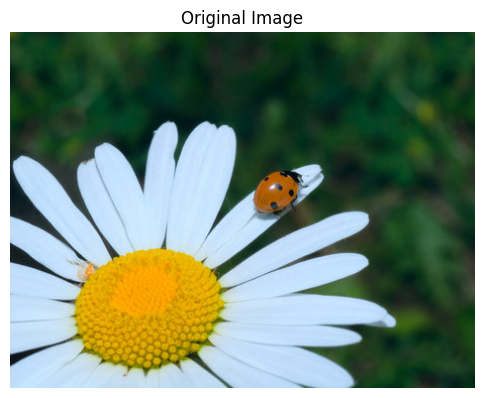

In [1]:
# Image segmentation is the task of partitioning an image into multiple segments.
# This script demonstrates a basic form of image segmentation by grouping
# pixels based on their color similarity using clustering techniques.
# Specifically, we'll read an image and later use K-Means to cluster colors.

from matplotlib.image import imread  # For reading image files as arrays (alternatively: imageio.imread)
import matplotlib.pyplot as plt 
import os

# Load the image from the current directory
image = imread(os.path.join("ladybug.jpg"))  # Returns a 3D NumPy array: (height, width, color_channels)

# Print the image dimensions for reference
# Shape is (height, width, 3) for RGB images
print(f"The image dimensions are: {image.shape}")

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis("off")  # Hides the axis ticks and labels
plt.title("Original Image")
plt.show()

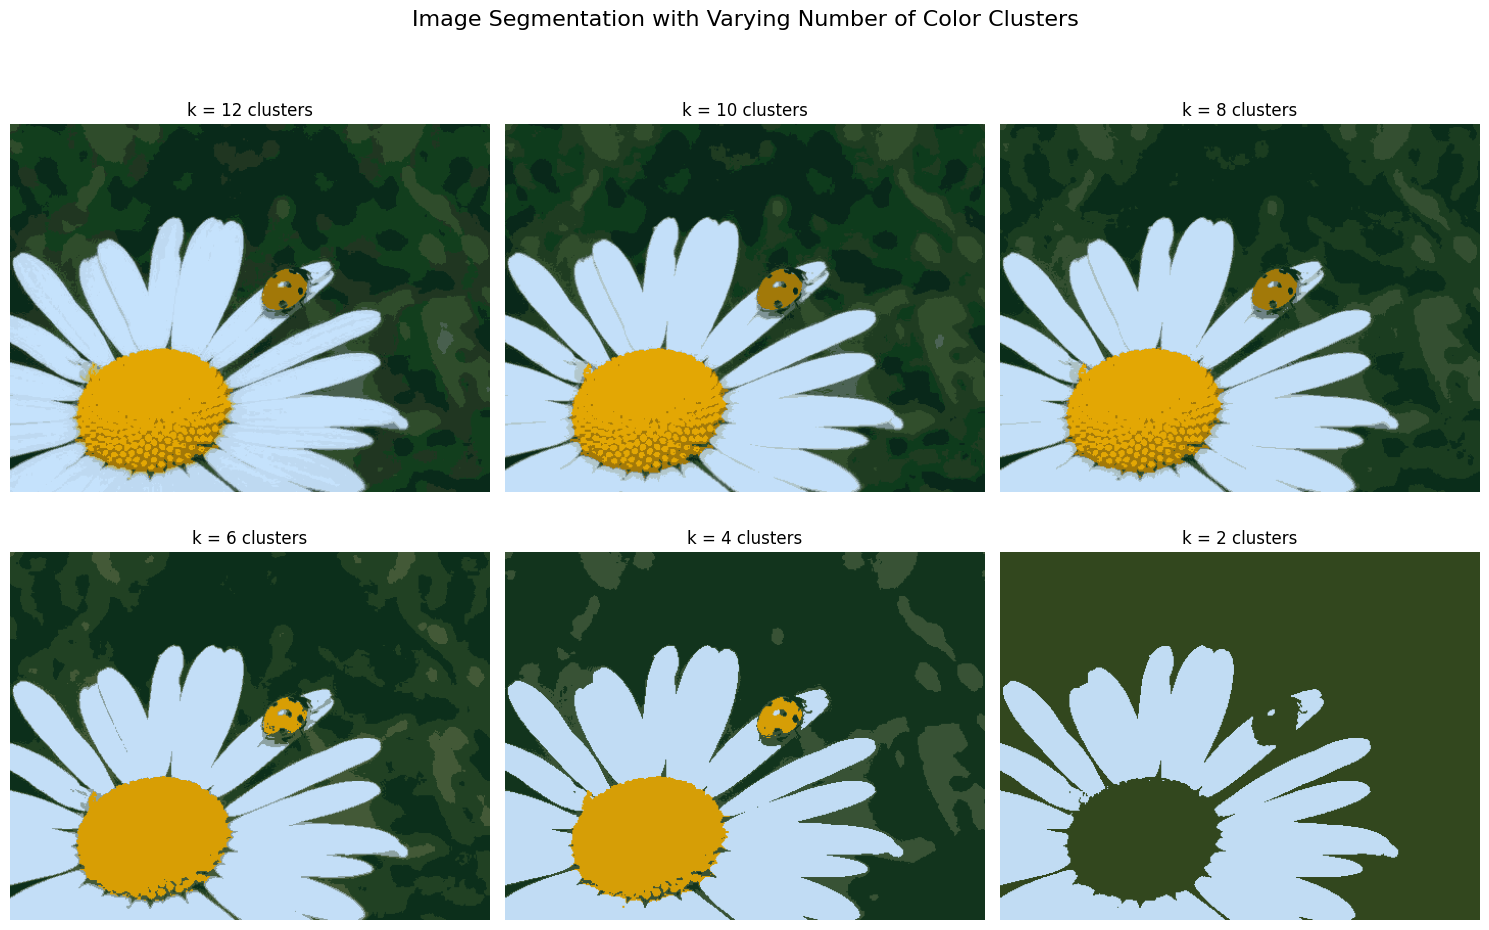

In [3]:
from sklearn.cluster import KMeans
import numpy as np

# Reshape the image data into a 2D array of pixels (each pixel is a 3-element RGB vector)
X = image.reshape(-1, 3)

# List of different numbers of clusters (colors) to segment the image with
k_values = [12, 10, 8, 6, 4, 2]

# List to store the segmented versions of the image
segmented_images = []

# Apply K-Means clustering for each value of k
for k in k_values:
    # Fit K-Means to the pixel data with k clusters
    kmeans = KMeans(n_clusters=k).fit(X)
    
    # Replace each pixel with the centroid of its cluster (compressing colors)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    
    # Reshape back to original image dimensions
    segmented_img = segmented_img.reshape(image.shape)
    
    # Normalize pixel values to [0, 1] range for correct image display (assumes original range was [0, 255])
    segmented_img = np.clip(segmented_img / 255.0, 0, 1)
    
    # Store the result
    segmented_images.append(segmented_img)

# Create a 2x3 grid of subplots to display all segmented images
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# First row of plots
axes[0, 0].imshow(segmented_images[0])
axes[0, 0].set_title("k = 12 clusters")
axes[0, 0].axis("off")

axes[0, 1].imshow(segmented_images[1])
axes[0, 1].set_title("k = 10 clusters")
axes[0, 1].axis("off")

axes[0, 2].imshow(segmented_images[2])
axes[0, 2].set_title("k = 8 clusters")
axes[0, 2].axis("off")

# Second row of plots
axes[1, 0].imshow(segmented_images[3])
axes[1, 0].set_title("k = 6 clusters")
axes[1, 0].axis("off")

axes[1, 1].imshow(segmented_images[4])
axes[1, 1].set_title("k = 4 clusters")
axes[1, 1].axis("off")

axes[1, 2].imshow(segmented_images[5])
axes[1, 2].set_title("k = 2 clusters")
axes[1, 2].axis("off")

# Add a common title and adjust spacing
plt.suptitle("Image Segmentation with Varying Number of Color Clusters", fontsize=16)
plt.tight_layout()  # Reduce overlap between subplots
plt.subplots_adjust(top=0.92)  # Make room for suptitle
plt.show()